In [52]:
# import library
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Reset default style
plt.style.use('default'); sns.reset_defaults(); plt.rcdefaults()

In [54]:
# rcParamsDefault
print(plt.rcParamsDefault['scatter.marker'])

o


In [55]:
# set style
plt.rcParams.update({
	# Figure
	'figure.figsize': [10, 6],
	'figure.titlesize': 16,
	'figure.titleweight': 'bold',
	'figure.facecolor': '#FFF',
	'figure.dpi': 200,

	# Font
	'font.sans-serif': ['Arial', 'DejaVu Sans', 'Helvetica', 'sans-serif'],
	'font.size': 12,

	# Axes
	'axes.facecolor': '#FFF',
	'axes.edgecolor':'#343a40',
	'axes.linewidth': 1.0,
	'axes.grid': True,
	'axes.axisbelow': True,
	'axes.titleweight': 'bold',
	'axes.titlesize': 14,
	'axes.labelsize': 12,
	'axes.spines.top': False,
	'axes.spines.right': False,

	# Grid
	'grid.color': '#E0E0E0',
	'grid.alpha': 0.7,
	'grid.linewidth': 0.6,

	# Tick
	'xtick.labelsize': 11,
	'ytick.labelsize': 11,

	# Legend
	'legend.fontsize': 11,
	'legend.edgecolor': '#343a40',

	# Lines
	'lines.linewidth': 2.0,

	# Export
	'savefig.dpi': 300, # High quality cho printing
	'savefig.bbox': 'tight', # Clean margins khi save
})

print("✅ Config applied!")

✅ Config applied!


In [56]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)
# print(type(heart_disease.data))
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
# print(type(X), type(y))
# print(len(X), len(y))
# X.head()
# print('---' * 20)

# cls = np.unique(y)
# print(cls)
	
# # metadata 
# print(heart_disease.metadata)
	
# # variable information 
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [57]:
# chuyển data -> df và lưu lại (chỉ dùng khi fetch dataset)
# df = pd.concat([X, y], axis=1)
# df.to_csv('heart_disease.csv', index=False)
# df.to_csv('heart_disease.csv', index=True)

In [58]:
df = pd.read_csv('heart_disease.csv')
# print(f'Shape: {df.shape}')
# print(f'Columns: {df.columns}')
# print(f'{df.dtypes}')
# print(df.isnull().sum())
# print(df.info())
# print(df.describe())
# print(np.unique(df['ca']))
total = len(df)
null_ca = df.isnull().sum()['ca'] / len(df['ca'])
null_thal = df.isnull().sum()['thal'] / len(df['thal'])
total_null = df.isnull().sum()['ca'] + df.isnull().sum()['thal'] 
# print({total_null}, {len(df)})
# print(f'{(total_null / len(df)):.2%}') 
print(f'{null_ca:.1%}, {null_thal:.1%}, {(total_null / total):.1%}')

1.3%, 0.7%, 2.0%


In [59]:
# Set bảng màu
RISK_COLORS = ['#2E8B57','#FECA57', '#f18f01', '#c92a2a', '#791919']

BINARY_COLORS = ['#2E8B57', '#c92a2a']

GENDER_COLORS = ['#FF69B4', '#1E90FF']

CP_COLORS = ['#791919', '#c92a2a', '#f18f01', '#2E8B57']

ECG_COLORS = ['#2e8b57','#f18f01', '#c92a2a']

SLOPE_COLORS = ['#2e8b57', '#4682B4', '#c92a2a']

CA_COLORS = ['#2E8B57', '#f18f01', '#c92a2a', '#791919']

THAL_COLORS = ['#2E8B57', '#f18f01', '#c92a2a']

## Vẽ các bdo đơn giản

In [60]:
df.duplicated().sum()

np.int64(0)

In [61]:
len(df)

303

### 1. Biểu đồ phân phối bệnh nhân mắc bệnh tim (Bar plot)

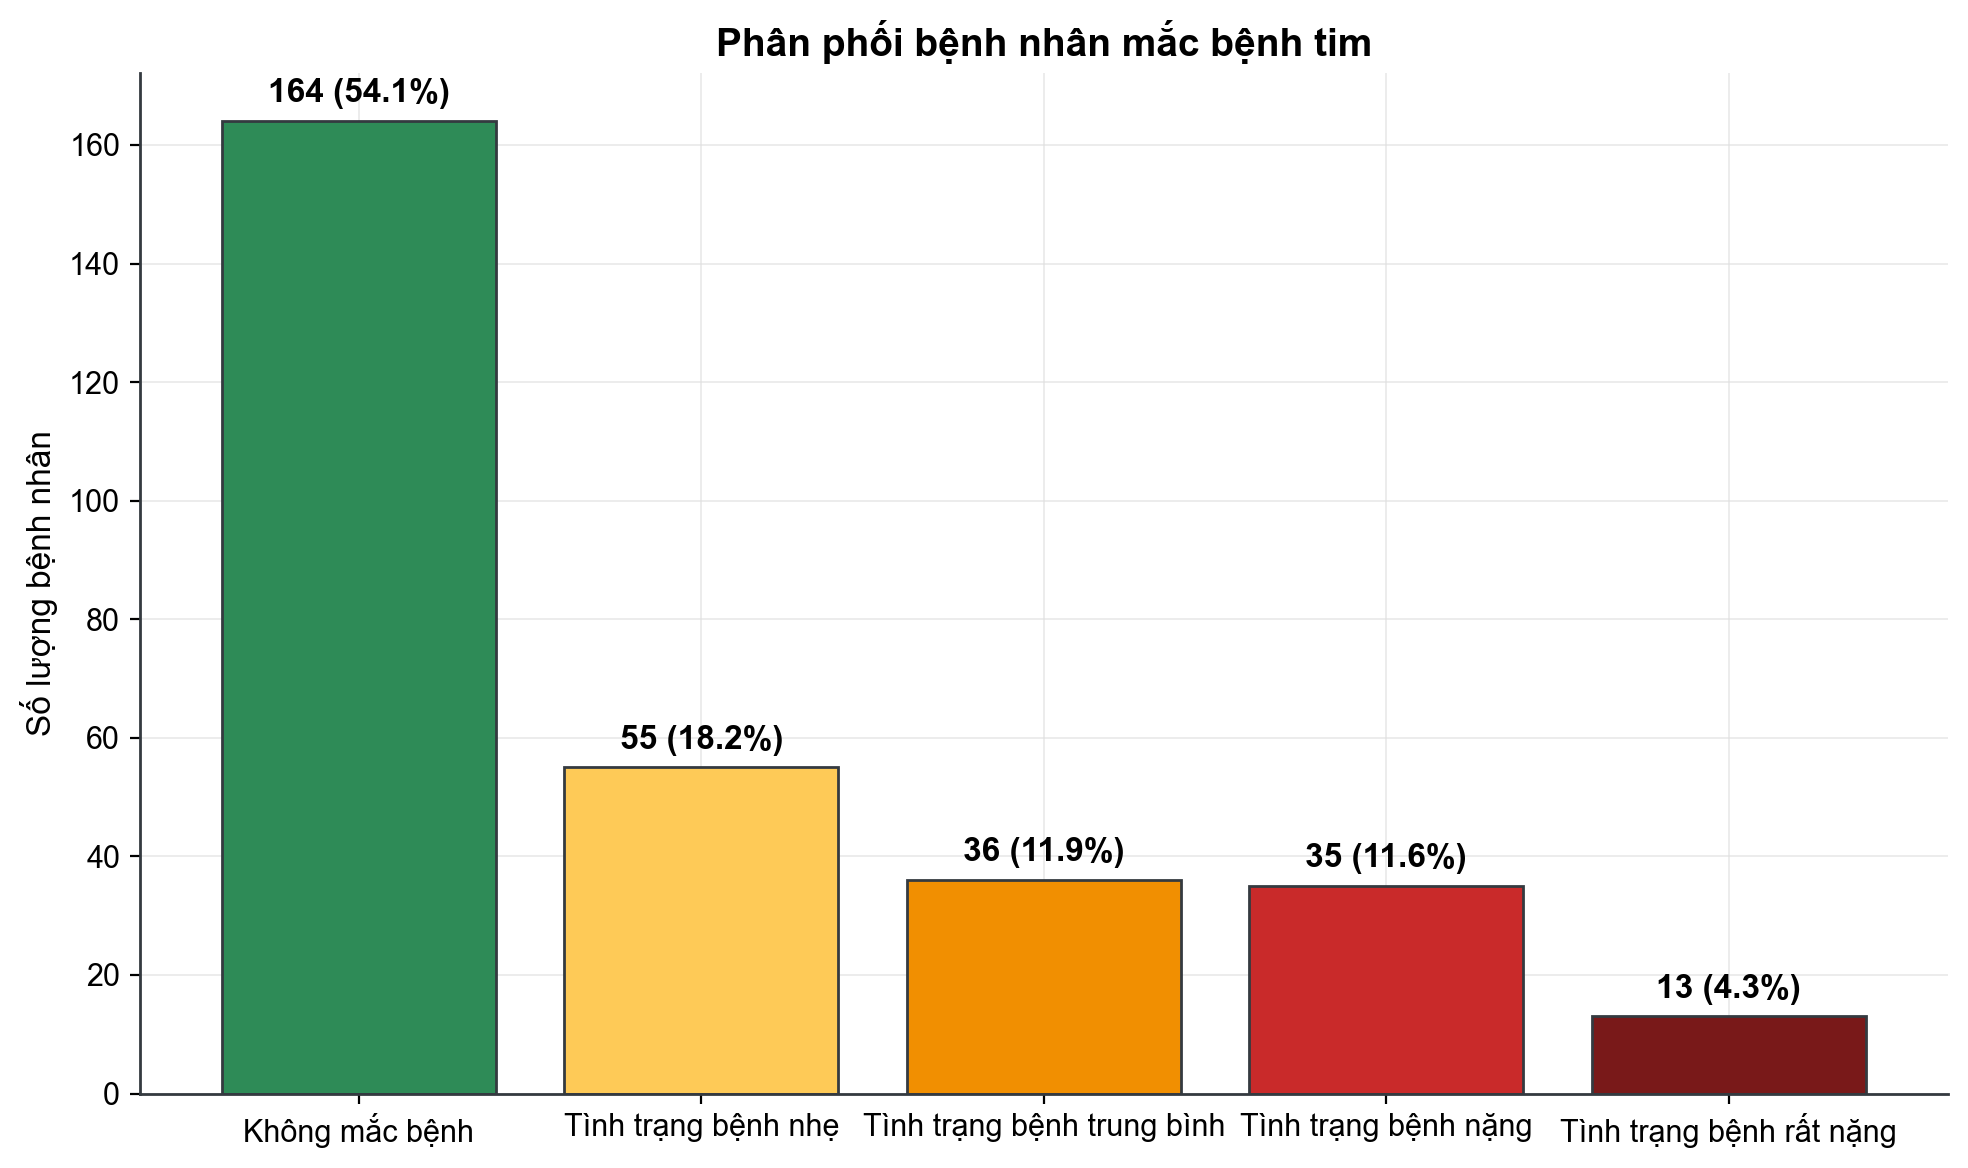

In [62]:
# multi-class
x = range(len(np.unique(df['num'])))
# print(df['num'].value_counts())
y = df['num'].value_counts().sort_index()
total = sum(y)
labels = ['Không mắc bệnh', 'Tình trạng bệnh nhẹ', 'Tình trạng bệnh trung bình', 'Tình trạng bệnh nặng', 'Tình trạng bệnh rất nặng']

plt.figure()
bars = plt.bar(x, y, color=RISK_COLORS, tick_label=labels, edgecolor='#343a40')
# total = sum(bars.datavalues)
for bar in bars:
	width = bar.get_width()
	height = bar.get_height()
	plt.text(bar.get_x() + width/2, height + 2, f'{height} ({(height / total):.1%})', ha='center', va='bottom', fontweight='bold')

plt.title('Phân phối bệnh nhân mắc bệnh tim')
plt.ylabel('Số lượng bệnh nhân')
plt.tight_layout()
plt.savefig('plots/plot1.png')
plt.show()

In [63]:
# (num) Multi-class -> Binary
print(f'Truoc khi transform: {df["num"].value_counts().sort_index()}')
# Transform target
df['target'] = (df['num'] > 0).astype(int)
print(f'Sau khi transform: {df["target"].value_counts().sort_index()}')

Truoc khi transform: num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
Sau khi transform: target
0    164
1    139
Name: count, dtype: int64


In [64]:
# drop column 'num'
if 'num' in df.columns:
	df = df.drop(columns='num')
	print('Đã xóa cột "num"')
else:
	print('Cột "num" đã bị xóa trước đó')

Đã xóa cột "num"


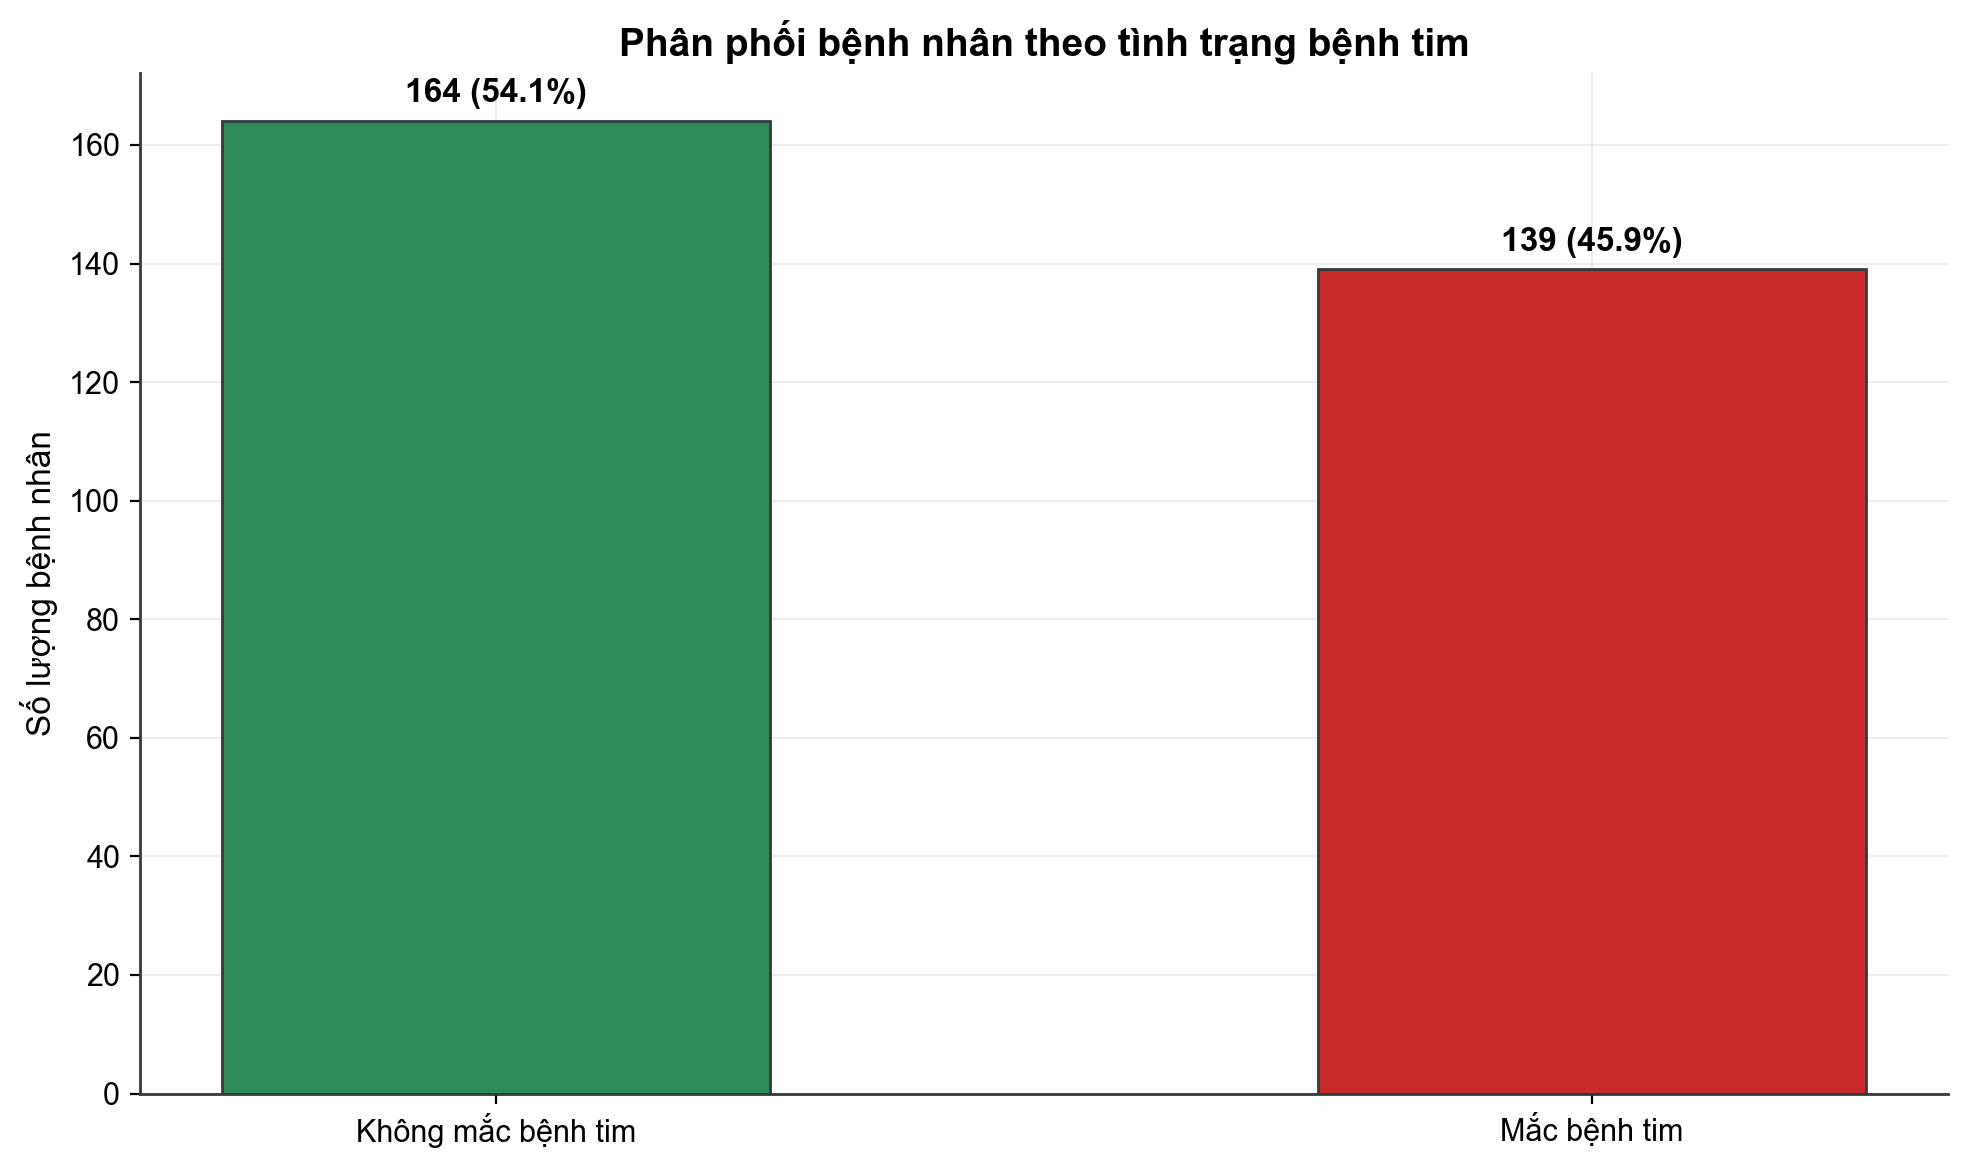

In [65]:
# 1. Biểu đồ phân phối Target (binary)
x = range(len(np.unique(df['target'])))
y = df['target'].value_counts().sort_index()
total = sum(y)
labels = ['Không mắc bệnh tim', 'Mắc bệnh tim']

plt.figure()
bars = plt.bar(x, y, color=BINARY_COLORS, tick_label=labels, edgecolor='#343a40', width=0.5)
for bar in bars:
	width = bar.get_width()
	height = bar.get_height()
	plt.text(bar.get_x() + width/2, height + 2, f'{height} ({(height / total):.1%})', ha='center', va='bottom', fontweight='bold')

plt.title('Phân phối bệnh nhân theo tình trạng bệnh tim')
plt.ylabel('Số lượng bệnh nhân')
plt.tight_layout()
plt.savefig('plots/plot1b.png')
plt.show()

In [66]:
slope_hd = len(df[(df['slope'] == 1) & df['target'] == 1])
total_slope = df['slope'].value_counts()[1]
slope_hd/total_slope

np.float64(0.2535211267605634)

### 2. Biểu đồ phân phối tuổi (Histogram)

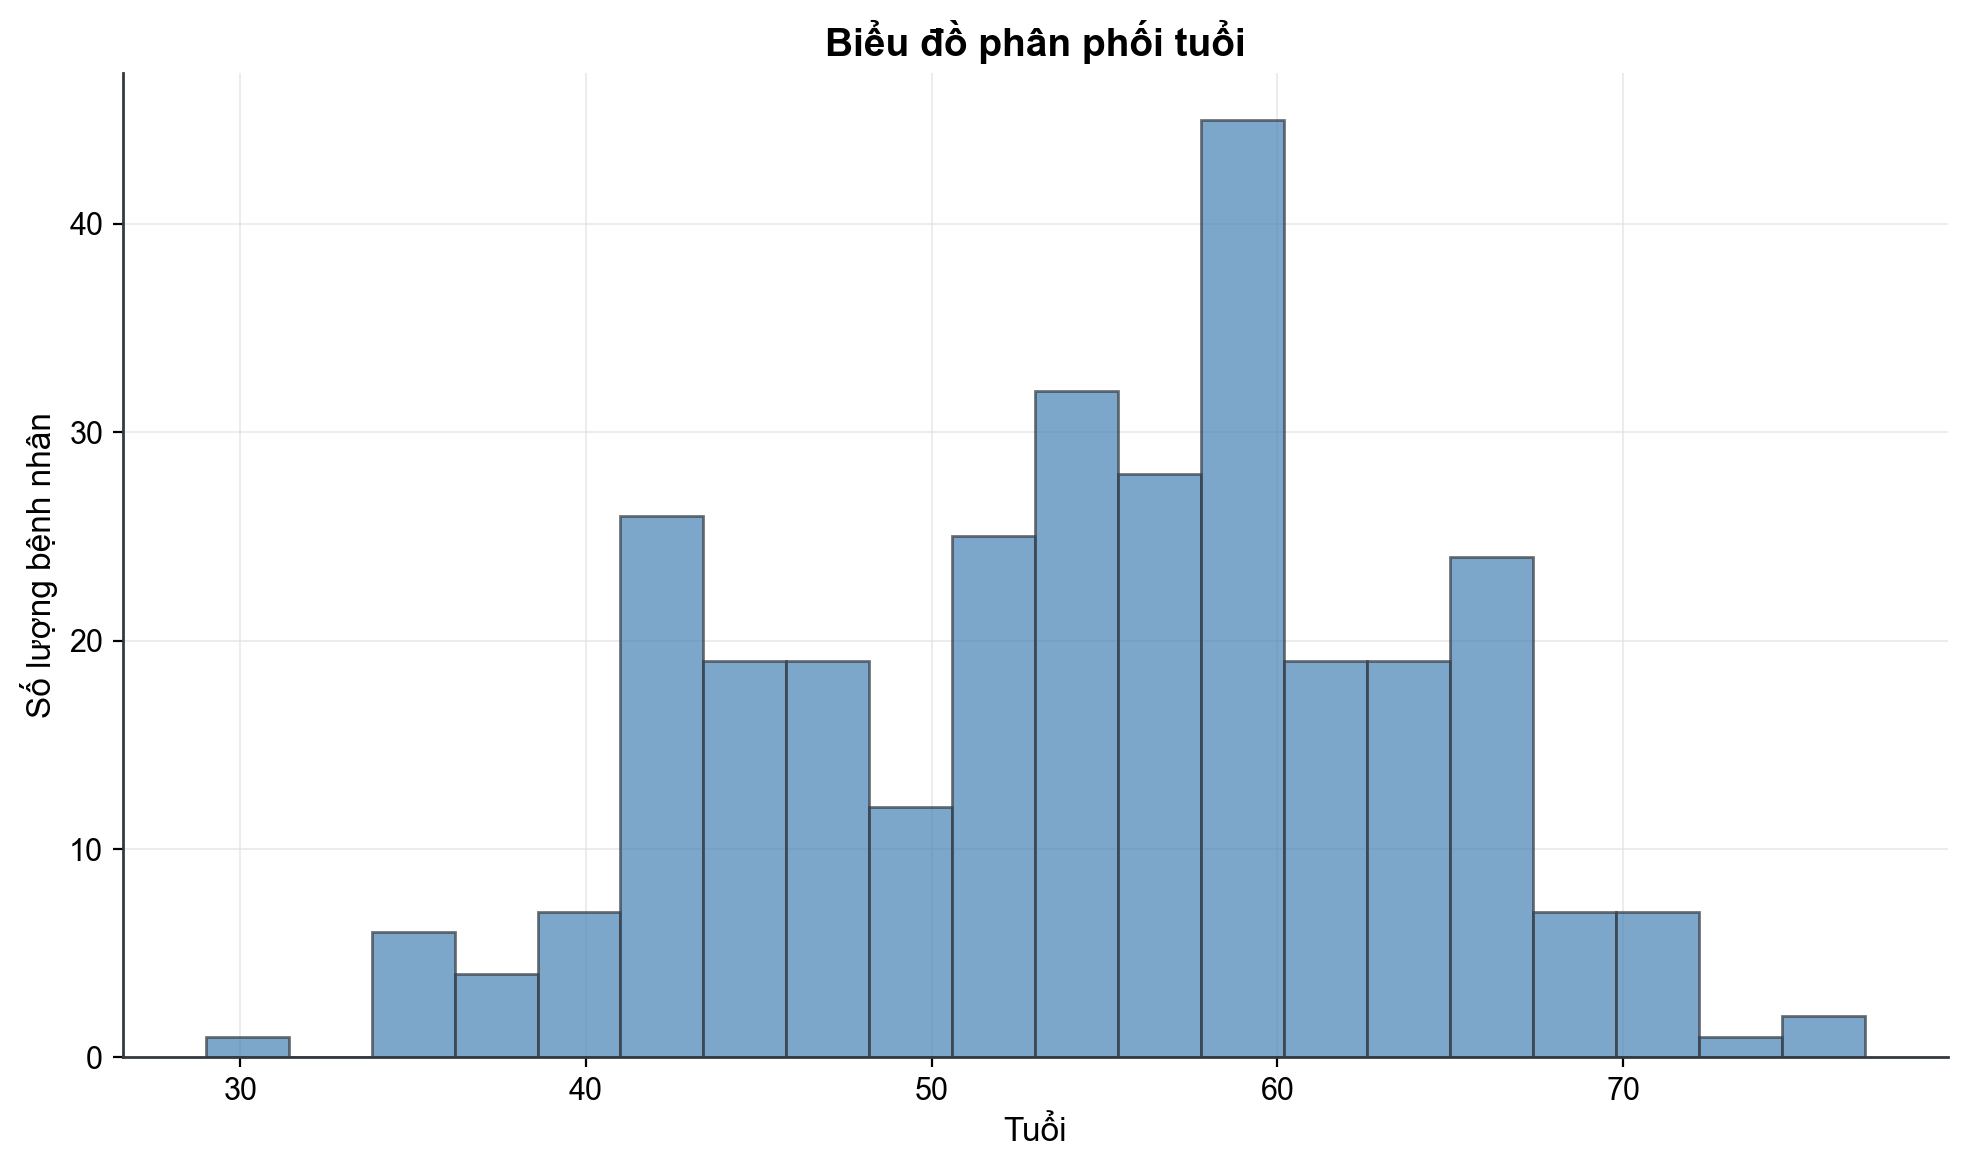

In [67]:
x = df['age']

plt.figure()
plt.hist(x, bins=20, color='#4682B4', alpha=0.7, edgecolor='#343a40')
plt.title('Biểu đồ phân phối tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng bệnh nhân')
plt.tight_layout()
plt.savefig('plots/plot2.png')
plt.show()

### 3. Biểu đồ phân phối giới tính (Bar plot)

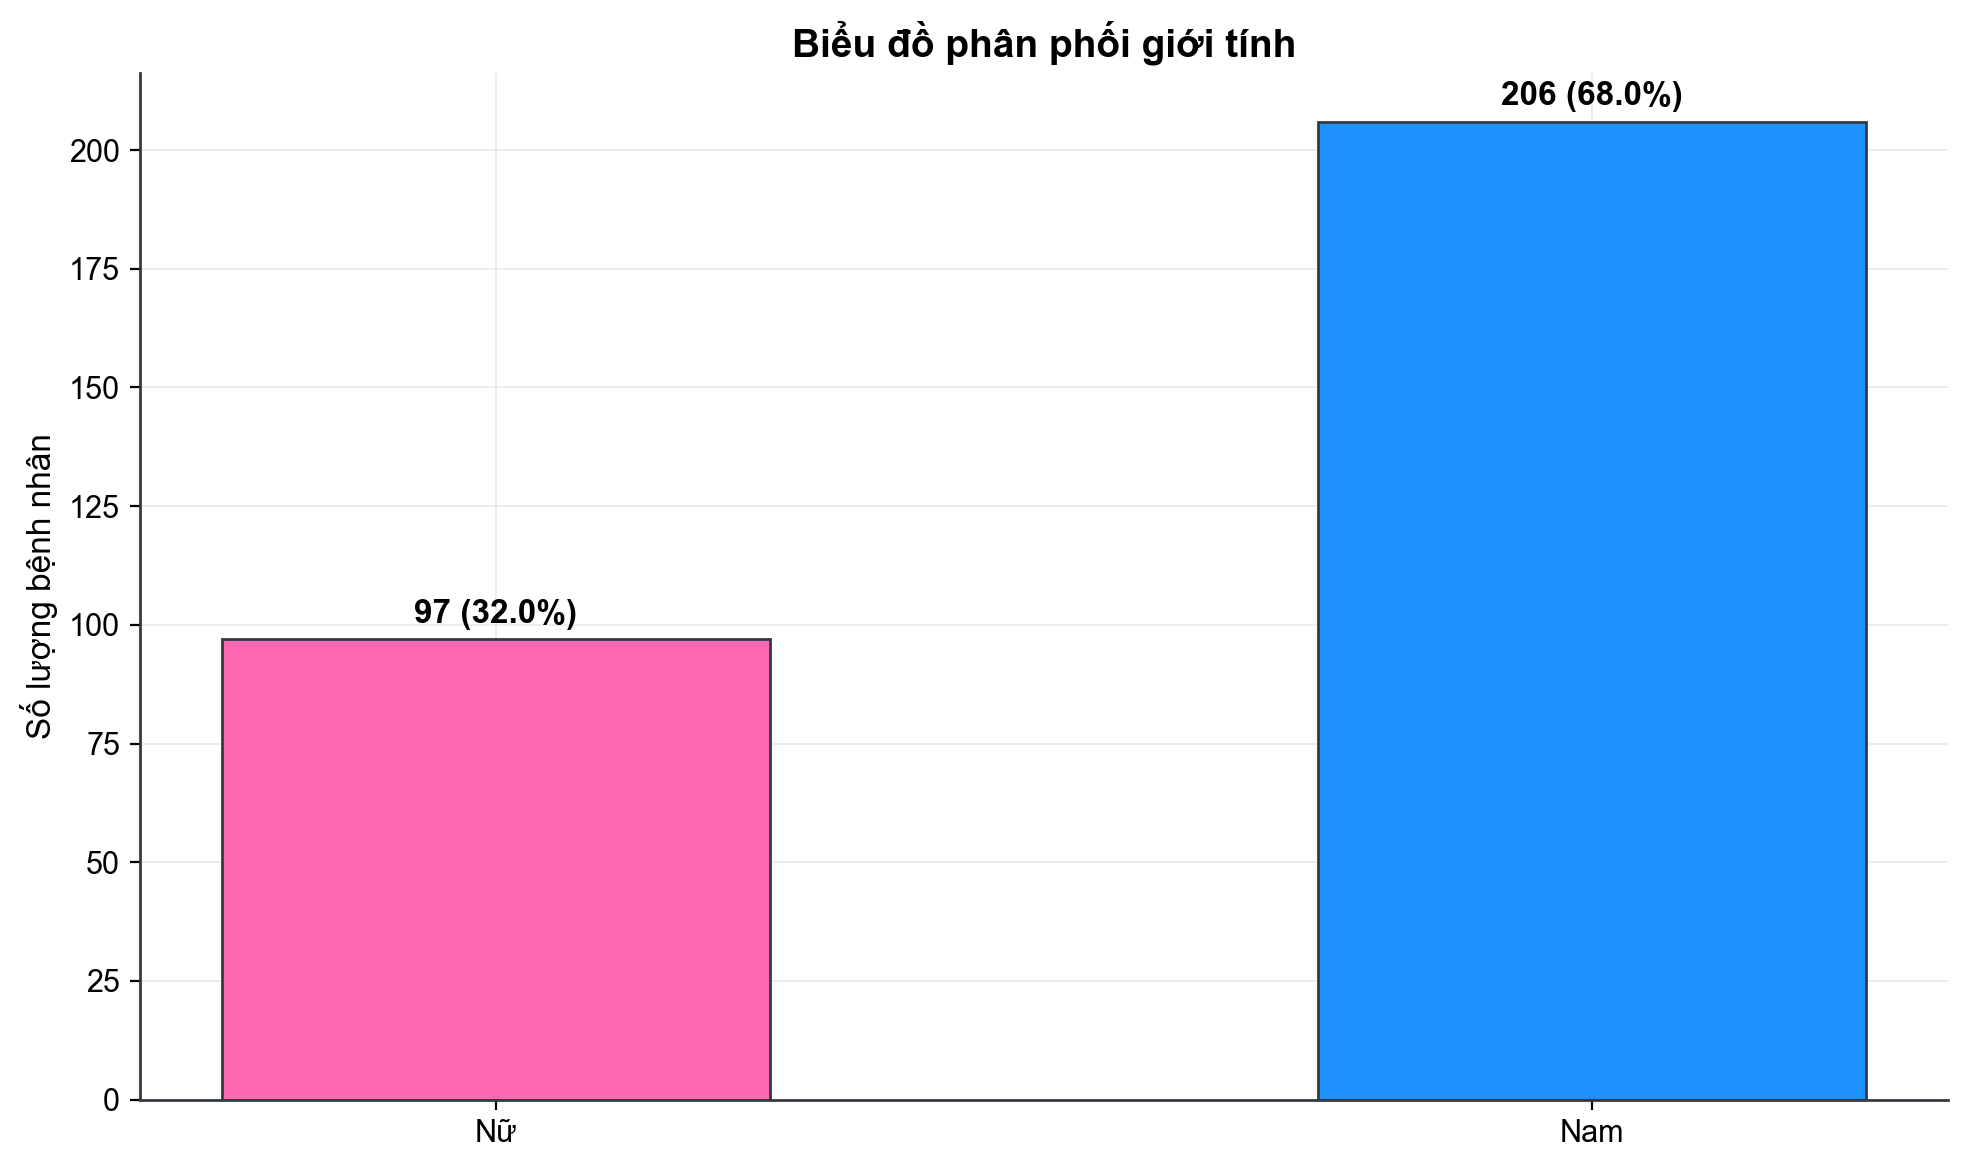

In [68]:
x = ['Nữ', 'Nam']
y = df['sex'].value_counts().sort_index()
total = sum(y)

plt.figure()
bars = plt.bar(x, y, color=GENDER_COLORS, edgecolor='#343a40', width=0.5)
for bar in bars:
	width = bar.get_width()
	height = bar.get_height()
	plt.text(bar.get_x() + width/2, height + 2, f'{height} ({(height / total):.1%})', ha='center', va='bottom', fontweight='bold')

plt.title('Biểu đồ phân phối giới tính')
plt.ylabel('Số lượng bệnh nhân')
plt.tight_layout()
plt.savefig('plots/plot3.png')
plt.show()

### 4. Biểu đồ nhiệt cho giá trị thiếu

In [74]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

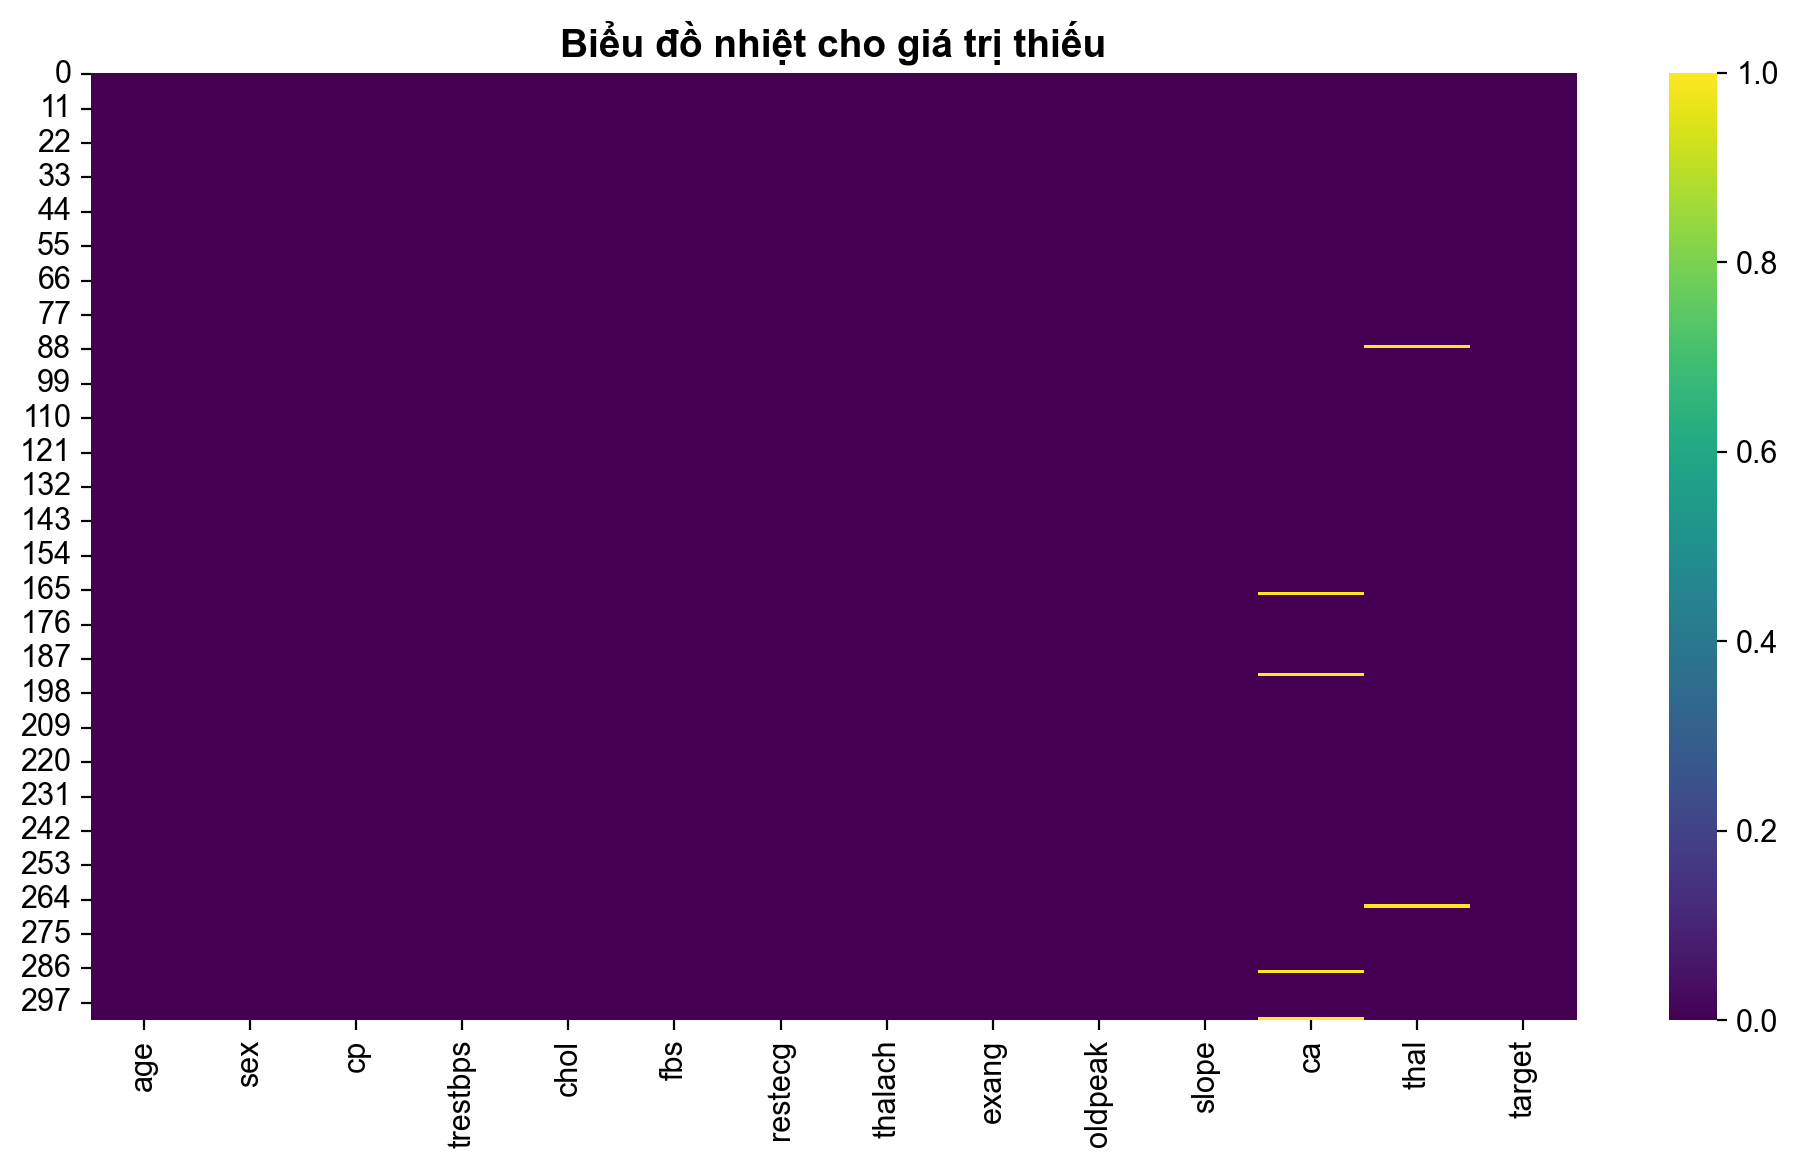

In [72]:
plt.figure()
# sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

sns.heatmap(df.isnull(), cmap='viridis')

plt.title('Biểu đồ nhiệt cho giá trị thiếu')
plt.tight_layout()
plt.savefig('plots/plot4.png')
plt.show()